In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
sys.path.append('../')

In [53]:
# from src.patch_dataset import PatchDataset
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from src.patch_dataset import PatchDataset
import os

In [54]:
dataset_dir = '../data/tma_dataset/'
image_base_dir = os.path.join(dataset_dir, "images")
mask_base_dir = os.path.join(dataset_dir, "masks/masks/")

metadata_df = (
    pd.read_csv(os.path.join(dataset_dir, "metadata/metadata.csv"))

    # sample id describes the bag level information
    .assign(sample_id=lambda df_: df_['patient_id'])

    .assign(filepath=lambda df_: df_['sample_id'].apply(lambda x: f"{x}.tif"))
)
metadata_df

,patient_id,event_duration,event_indicator,sample_id,filepath
0,0,100,0,0,0.tif
1,1,50,1,1,1.tif
2,2,20,1,2,2.tif


In [55]:
# from metadata_df 

dataset = PatchDataset(
    image_base_dir=image_base_dir,
    mask_base_dir=mask_base_dir,
    info_df=metadata_df,    
    label_cols=['event_duration', 'event_indicator'],
    patch_size=14,
    n_patches=5, # return 5 patches per bag
)

Preparing patches for 0.tif


patient_id                                                         0
event_duration                                                   100
event_indicator                                                    0
sample_id                                                          0
filepath                                                       0.tif
patch_info         [[0, 3], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5...
max_rows                                                           7
max_cols                                                           7
patch_size                                                        14
img_mag_dsf                                                        1
initial_dsf                                                        1
dtype: object

label [100   0]


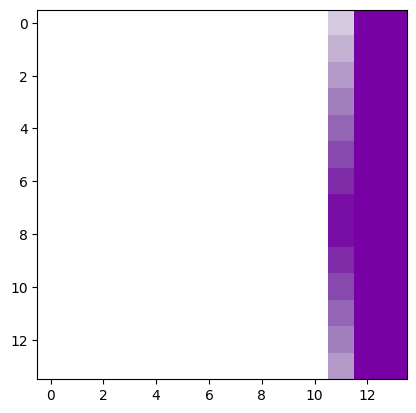

In [56]:
import numpy as np

# dataset can now be iterated to get the patches, labels and metadata
for patch_bag, label, metadata in dataset:

    # metadata from the csv is present
    display(pd.Series(metadata))

    # image can be plotted if color axis is swapped to be last
    plt.imshow(np.swapaxes(patch_bag[0], 0, 2))

    # label can also be read or used for training as duration/indicator
    print("label", label)
    break